errorrate : 14.606741573033707


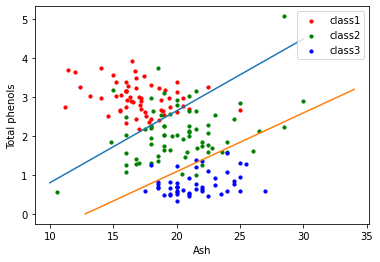

In [12]:
import numpy as np
import matplotlib.pyplot as plt

wine_data = np.loadtxt('wine.data',delimiter=',')
#print(wine_data)
features = wine_data[:,1:]
target = wine_data[:,0]
#print(features)
plt.scatter(features[:59,3],features[:59,6], 
            s=10, c='r',label='class1')
plt.scatter(features[59:130,3],features[59:130,6], \
            s=10, c='g',label='class2')
plt.scatter(features[130:178,3],features[130:178,6], \
            s=10, c='b',label='class3')
plt.legend(loc='upper right');
point1 = [10,0.8]
point2 = [30,4.5]
x_values = [point1[0], point2[0]] 
y_values = [point1[1], point2[1]]
plt. plot(x_values, y_values)
point1 = [12.8,0]
point2 = [34,3.2]
x_values = [point1[0], point2[0]] 
y_values = [point1[1], point2[1]]
plt.xlabel('Ash')
plt.ylabel('Total phenols')

#calculating error rate

redfalsepoints = 3
greenfalsepoints= 20
bluefalsepoints= 3
totalpoints = 178
errorrate = (3+3+20)/178 *100 #formula to calcuate error rate
print('errorrate :',errorrate )
plt. plot(x_values, y_values)


(4032, 3024, 3)


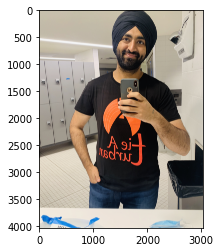

In [15]:
import numpy as np
import matplotlib.pyplot as plt
img=plt.imread('manpreet1.jpg')
plt.imshow(img)
img.shape
data = np.asarray(img)
print(data.shape)
# its a 4032 X 3024 X 3 image

(4032, 3024)


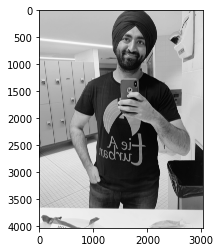

In [4]:
#reference for rgb2gray https://moonbooks.org/Articles/How-to-convert-an-image-to-grayscale-using-python-/
#greyscaleimage
f=[0.299, 0.587, 0.144]
def rgb2gray(img):
    return np.dot(img[...,:3], f ) 
gray = rgb2gray(img)

print(gray.shape)
plt.imshow(gray,cmap='gray')

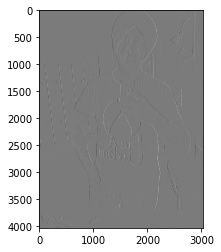

In [5]:
#reference for vertical and horizontal edge filter
#http://www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/

#vertical filter
f1=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
y=np.zeros((4030,3022))

for j in range(4030):
    for i in range(3022):
        y[j,i]=np.sum(f1*gray[j:j+3,i:i+3])
#vertical edge detection image
plt.imshow(y,cmap='gray') 

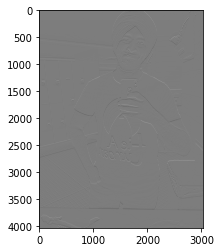

In [9]:
#horizontal filter
y1=np.zeros((4030,3022))
f2=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
for j in range(4030):
    for i in range(3022):
        y1[j,i]=np.sum(f2*gray[j:j+3,i:i+3])
#horizontal edge detection image
plt.imshow(y1,cmap='gray')

In [7]:
##reference https://medium.com/@akumar5/computer-vision-gaussian-filter-from-scratch-b485837b6e09
#applying Gaussian filter on grayscale image for converting to blur image
kernel = np.zeros((90,90))
y2=np.zeros((3943,2935))
sigma=15
for x in range(-(89//2), (89//2)+1):
    for y in range(-(89//2), (89//2)+1):
            x1 = 2*np.pi*(sigma**2)
            x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
            kernel[x+(89//2), y+(89//2)] = (1/x1)*x2
#print(kernel.shape)

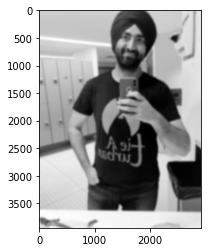

In [8]:
for j in range(3943):
    for i in range(2935):
        y2[j,i]=np.sum(kernel*gray[j:j+90,i:i+90])  
#blur image
plt.imshow(y2,cmap='gray')